<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-Validation-Test-Split-with-Stratify" data-toc-modified-id="Train-Validation-Test-Split-with-Stratify-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train Validation Test Split with Stratify</a></span></li><li><span><a href="#Model:-LightGBM" data-toc-modified-id="Model:-LightGBM-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model: LightGBM</a></span></li><li><span><a href="#HPO-Hyper-Parameter-Optimization-with-Optuna" data-toc-modified-id="HPO-Hyper-Parameter-Optimization-with-Optuna-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>HPO Hyper Parameter Optimization with Optuna</a></span></li><li><span><a href="#LightGBM-cross-validation" data-toc-modified-id="LightGBM-cross-validation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>LightGBM cross validation</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model Interpretation</a></span><ul class="toc-item"><li><span><a href="#Model-interpretation-using-eli5" data-toc-modified-id="Model-interpretation-using-eli5-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Model interpretation using eli5</a></span></li><li><span><a href="#Model-interpretation-using-lime" data-toc-modified-id="Model-interpretation-using-lime-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Model interpretation using lime</a></span></li><li><span><a href="#Model-interpretation-using-shap" data-toc-modified-id="Model-interpretation-using-shap-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Model interpretation using shap</a></span></li></ul></li><li><span><a href="#Time-taken" data-toc-modified-id="Time-taken-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Time taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Data Description

The datasets contains transactions made by credit cards in September
2013 by european cardholders.


This dataset presents transactions that occurred in two days,
where we have 492 frauds out of 284,807 transactions. 

The dataset is highly unbalanced, the positive class (frauds)
account for 0.172% of all transactions.

It contains only numerical input variables which are
the result of a PCA transformation.


Unfortunately, due to confidentiality issues,
we cannot provide the original features and 
more background information about the data.


Features V1, V2, ... V28 are the principal
components obtained with PCA,
the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

Feature 'Time' contains the seconds elapsed between each transaction
and the first transaction in the dataset. The feature 'Amount'
is the transaction Amount, this feature can be used for 
example-dependant cost-senstive learning. 

Feature 'Class' is the response variable and it takes value
1 in case of fraud and 0 otherwise.

# Imports

In [2]:
import time
time_start_notebook = time.time()

In [3]:
# my private module
import bhishan

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('ggplot') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
SEED=100
np.random.seed(SEED)

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
pd.options.display.float_format = '{:,}'.format # df.A.value_counts().astype(float)
from pandas.api.types import CategoricalDtype
np.set_printoptions(precision=3)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

import IPython
from IPython.display import display, HTML, Image, Markdown

import scipy
from scipy import stats
from scikitplot import metrics as skmetrics

# scale and split
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# dimension reduction for visualization
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# hyperparameters search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# prediction
from sklearn.model_selection import cross_val_predict

# model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# roc auc etc scores
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

# roc auc curves
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# pickle
import six
import joblib

# lightgbm
import lightgbm as lgb
from lightgbm import LGBMClassifier

# optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # use INFO to see progress

# model evaluation
import shap
import lime
import eli5
import yellowbrick
import scikitplot
import lime.lime_tabular
from eli5.sklearn import PermutationImportance

# plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


# versions
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


Bhishan Poudel 2020-09-29 

CPython 3.7.7
IPython 7.18.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

bhishan     0.3.1
scipy       1.4.1
eli5        0.10.1
shap        0.35.0
yellowbrick 1.1
seaborn     0.11.0
json        2.0.9
optuna      2.0.0
matplotlib  3.2.1
IPython     7.18.1
sklearn     0.23.1
six         1.15.0
joblib      0.16.0
lightgbm    2.3.1
pandas      1.1.0
scikitplot  0.3.7
numpy       1.18.4



# Useful Scripts

In [6]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

def print_scores(ytest,ypreds):
    print(f'Precision: {precision_score(ytest,ypreds): .2f}')
    print(f'Recall   : {recall_score(ytest,ypreds): .2f}')
    print(f'F1-score : {f1_score(ytest,ypreds): .2f}')

    c = classification_report(ytest, ypreds)
    print(c)

    cm = confusion_matrix(ytest,ypreds)
    names = ['Not-converted','Converted']
    df_cm = pd.DataFrame(cm,index=names,columns=names)
    df_cm = df_cm.style.background_gradient()
    display(df_cm)

df_eval = pd.DataFrame({'Model': [],
                        'Description':[],
                        'Accuracy':[],
                        'Precision':[],
                        'Recall':[],
                        'F1':[],
                        'AUC':[],
                    })

# Load the data

In [7]:
df = pd.read_csv('../data/raw/creditcard.csv.zip',compression='zip')
print(df.shape)
df.head()

(284807, 31)


Time                  V1                  V2               V3  \
0   0.0    -1.3598071336738 -0.0727811733098497 2.53634673796914   
1   0.0  1.1918571113148602    0.26615071205963 0.16648011335321   
2   1.0   -1.35835406159823 -1.3401630747360902 1.77320934263119   
3   1.0 -0.9662717115720871  -0.185226008082898 1.79299333957872   
4   2.0 -1.1582330934952298  0.8777367548484508   1.548717846511   

                   V4                   V5                  V6  \
0    1.37815522427443 -0.33832076994251803   0.462387777762292   
1   0.448154078460911   0.0600176492822243 -0.0823608088155687   
2  0.3797795930343279   -0.503198133318193    1.80049938079263   
3  -0.863291275036453  -0.0103088796030823    1.24720316752486   
4 0.40303393395512105 -0.40719337731165295  0.0959214624684256   

                   V7                   V8                  V9  \
0   0.239598554061257   0.0986979012610507   0.363786969611213   
1 -0.0788029833323113   0.0851016549148104  -0.255425128109186   
2  0.7914609564504219  0.24767578658899103 -1.5146543226058302   
3    0.23760893977178    0.377435874652262   -1.38702406270197   
4  0.5929407453855451 -0.27053267719228197  0.8177393082352941   

                   V10                  V11                 V12  \
0   0.0907941719789316   -0.551599533260813  -0.617800855762348   
1 -0.16697441400461402   1.6127266610547901    1.06523531137287   
2    0.207642865216696   0.6245014594248951 0.06608368526883099   
3  -0.0549519224713749 -0.22648726383540102   0.178228225877303   
4   0.7530744319763539  -0.8228428779463629    0.53819555014995   

                 V13                  V14                V15  \
0 -0.991389847235408 -0.31116935369987897   1.46817697209427   
1   0.48909501589608   -0.143772296441519  0.635558093258208   
2 0.7172927314108309   -0.165945922763554   2.34586494901581   
3  0.507756869957169    -0.28792374549456 -0.631418117709045   
4    1.3458515932154    -1.11966983471731  0.175121130008994   

                   V16                 V17                  V18  \
0 -0.47040052525947795 0.20797124192924202   0.0257905801985591   
1    0.463917041022171  -0.114804663102346 -0.18336127012399397   
2  -2.8900831944423104    1.10996937869599 -0.12135931319588801   
3  -1.0596472454324999  -0.684092786345479     1.96577500349538   
4   -0.451449182813529  -0.237033239362776  -0.0381947870352842   

                   V19                 V20                   V21  \
0    0.403992960255733   0.251412098239705    -0.018306777944153   
1 -0.14578304132525902 -0.0690831352230203    -0.225775248033138   
2    -2.26185709530414   0.524979725224404     0.247998153469754   
3     -1.2326219700892  -0.208037781160366    -0.108300452035545   
4    0.803486924960175 0.40854236039275804 -0.009430697132329191   

                    V22                  V23                  V24  \
0     0.277837575558899   -0.110473910188767   0.0669280749146731   
1   -0.6386719527718511  0.10128802125323402 -0.33984647552912706   
2     0.771679401917229   0.9094122623477191   -0.689280956490685   
3 0.0052735967825345295   -0.190320518742841  -1.1755753318632098   
4    0.7982784945897099 -0.13745807961906303  0.14126698382476902   

                   V25                  V26                  V27  \
0  0.12853935827352803   -0.189114843888824  0.13355837674038698   
1    0.167170404418143    0.125894532368176 -0.00898309914322813   
2  -0.3276418337352511   -0.139096571514147  -0.0553527940384261   
3    0.647376034602038 -0.22192884445840697   0.0627228487293033   
4 -0.20600958761975602    0.502292224181569    0.219422229513348   

                  V28  Amount  Class  
0 -0.0210530534538215  149.62      0  
1  0.0147241691924927    2.69      0  
2 -0.0597518405929204  378.66      0  
3  0.0614576285006353   123.5      0  
4 0.21515314749920603   69.99      0

# Train Validation Test Split with Stratify

In [8]:
from sklearn.model_selection import train_test_split

target = 'Class'
df_Xtrain_orig, df_Xtest, ser_ytrain_orig, ser_ytest = train_test_split(
    df.drop(target,axis=1), 
    df[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df[target])

In [9]:
df_Xtrain, df_Xvalid, ser_ytrain, ser_yvalid = train_test_split(
    df_Xtrain_orig, 
    ser_ytrain_orig,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ser_ytrain_orig)

print(df_Xtrain.shape)
df_Xtrain.head()

(182276, 30)


Time                  V1                  V2                  V3  \
35574   38,177.0    1.43041895583907  -0.718078273061458   0.364706006324926   
46862   42,959.0   -2.42552313058018 -1.7902926006881001  2.5221389768983102   
181781 125,124.0  -0.255450935130182   -1.98895515627657 -1.2597251418278201   
218475 141,330.0 -0.8520004354834391   -0.13075255373684    1.36662454353544   
15062   26,410.0 -0.7828453817537739   0.368745434001026  2.4914739088313596   

                       V4                   V5                  V6  \
35574  -0.744257473149098  -0.5560897201441141  0.6989482068679179   
46862   0.581140633163287   0.9184531832522971   0.594425982193754   
181781  -2.19605219887801    -1.32435692037247 0.00499938444910752   
218475 -0.375115575265111   1.2572453806514399  0.0500093368154681   
15062  1.6016483675241298 -0.41705809122871995    1.01722471384025   

                        V7                 V8                  V9  \
35574   -0.949852186766983  0.131007763245634  -0.314353492519604   
46862    0.224540823697409  0.373885386265843  -0.168411117217667   
181781    1.66153728445588 -0.422358532615071 -2.2192743260713597   
218475  -0.218388574220256  0.176564120394538   0.335048917326039   
15062  0.36616374960489506 0.0200696738356129  0.0372048686022882   

                       V10                  V11                 V12  \
35574   0.5123221623919001 -0.20225530132487196    0.76664831032754   
46862  -0.7204207135909679     1.39470956390129  1.1364358241366799   
181781  0.6253331480590429  -1.6254566588452601 -1.4969215401626599   
218475  -0.874306369590348  -1.6177097453816203   0.480534791694251   
15062   0.0388842788809198  -0.7119687759500719  -0.376249545016347   

                        V13                  V14                 V15  \
35574      1.49508225190941    -1.03747492341535   -1.93543380139642   
46862      0.50845513516421 -0.38906664498250604   -0.16516551024834   
181781  0.31291286959164805   -0.294536042315215 -0.8849742899286769   
218475     1.48863866626645   -0.536655923976624  0.3786382299586721   
15062  -0.00444083823519426 -0.46425016434183797  1.7428378143268202   

                        V16                  V17                 V18  \
35574    0.8977151699159541    0.069579774890693 -0.9025561291534651   
46862   -0.0405200624981949 -0.46496558710269104 -0.0578033672757603   
181781  -0.7656458095981391  0.34359066044028996 0.48087825831898706   
218475 0.006026527301341639  -0.7186818793706129  0.5657790682493828   
15062    -0.691621250457509    0.271711719459851   0.257127438178971   

                        V19                 V20                V21  \
35574      1.84386660076113 0.15842370711001003 0.0420126270964324   
46862   -1.4936350411317803   0.984535141775769  0.538437895509049   
181781 -0.44134183826670403   0.697580087093914  0.566412836289991   
218475     0.50429900271814   0.281606905666141  0.277023050729735   
15062    1.1698888283455702   0.168044587401304  0.126913443438916   

                       V22                  V23                  V24  \
35574  0.42957551381044107 -0.30193129600373103  -0.9337733224173052   
46862   0.8775602301510121   0.5905952983856851   -0.293545446878692   
181781    1.24138484015765   0.9553733555764592    0.460405341213206   
218475  0.7868770976282209   -0.262422957364254   0.0970493912974151   
15062    0.822213100158958  -0.0743622052454365 -0.26030060136174205   

                      V25                  V26                  V27  \
35574  0.8404900033587509  -0.0277760401270655   0.0446875678910066   
46862   0.524021652151913   -0.328189339662725 -0.20528526764013297   
181781 0.0875238634432579    0.127633107387344   -0.104305750882682   
218475  0.200534372793904 -0.11507807395968199    0.141611703414594   
15062   0.212851921429917   0.0663996553581394   -0.051980435988747   

                        V28  Amount  
35574  -0.00752176161788988     0.2  
46862    -0.109163071886881   300.0  
181781 

# Model: LightGBM
```python
n_jobs=-1
random_state=None

learning_rate
max_depth
min_child_samples

reg_alpha
reg_lambda
subsample

min_child_weight
min_split_gain
n_estimators

num_leaves
objective
boost='gbdt'
metric='auc'
```

In [10]:
import joblib
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# time
time_start = time.time()

model_name = 'lightgbm'
desc = 'default'
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig.to_numpy().ravel()
Xtx = df_Xtest
ytx = ser_ytest.to_numpy().ravel()
Xvd = df_Xvalid
yvd = ser_yvalid.to_numpy().ravel()

# model
model = lgb.LGBMClassifier(random_state=SEED)

# fit and save the model
model.fit(Xtr, ytr)

joblib.dump(model,'../outputs/clf_lgb.pkl')

# load the saved model
model = joblib.load('../outputs/clf_lgb.pkl')

# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(model, Xtx, ytx, cv=skf)
ypreds = ypreds_cv

# model evaluation
average = 'binary'
row_eval = [model_name,desc, 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average=average),
            recall_score(ytx, ypreds, average=average),
            f1_score(ytx, ypreds, average=average),
            roc_auc_score(ytx, ypreds),
            ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

Time taken: 0 min 3 secs


Model Description           Accuracy           Precision  \
0  lightgbm     default 0.9973666654962958 0.27586206896551724   

               Recall                 F1                AUC  
0 0.32653061224489793 0.2990654205607476 0.6625267017330286

In [11]:
print_scores(ytx,ypreds)

Precision:  0.28
Recall   :  0.33
F1-score :  0.30
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.28      0.33      0.30        98

    accuracy                           1.00     56962
   macro avg       0.64      0.66      0.65     56962
weighted avg       1.00      1.00      1.00     56962



# HPO Hyper Parameter Optimization with Optuna

In [12]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # use INFO to see progress

dtrain = lgb.Dataset(df_Xtrain, label= ser_ytrain)

def objective(trial):

    params_lgb_optuna = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbose': 0,
        'boosting_type': 'gbdt',
        # lambda
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        # leaves
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        # fraction
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.2, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        # child
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-5, 1e4),
    }

    booster_gbm = lgb.train(params_lgb_optuna, dtrain)
    
    yscores = booster_gbm.predict(df_Xvalid)
    ypreds = np.rint(yscores)
    
    score = roc_auc_score(ser_yvalid.to_numpy().ravel(),
                              ypreds)
    return score

In [13]:
# NOTE: there is inherent non-determinism in optuna hyperparameter selection
#       we may not get the same hyperparameters when run twice.


sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 10 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='lgb_optuna',
                            storage='sqlite:///lgb_optuna_fraud_detection.db',
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS)

In [14]:
# Resume from last study
N_TRIALS = 10 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='lgb_optuna',
                            storage='sqlite:///lgb_optuna_fraud_detection.db',
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS)

In [15]:
print(f'Number of finished trials: {len(study.trials)}')

# best trail
best_trial = study.best_trial

# best params
params_best = study.best_trial.params
params_best

Number of finished trials: 40


{'bagging_fraction': 0.7965966318079111,
 'bagging_freq': 6,
 'feature_fraction': 0.5366738542149861,
 'lambda_l1': 3.401802676365427e-06,
 'lambda_l2': 2.580497169876781,
 'min_child_samples': 32,
 'min_child_weight': 1.4054740592068409,
 'num_leaves': 105,
 'subsample': 0.505271923966288}

In [17]:
# time
time_start = time.time()

model_name = 'lightgbm'
desc = 'grid search optuna'
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig.to_numpy().ravel()
Xtx = df_Xtest
ytx = ser_ytest.to_numpy().ravel()
Xvd = df_Xvalid
yvd = ser_yvalid.to_numpy().ravel()


# use best model
params_best =  study.best_trial.params

model = lgb.LGBMClassifier(random_state=SEED)
model.set_params(**params_best)

# fit and save the model
model.fit(Xtr, ytr)
joblib.dump(model,'../outputs/clf_lgb_grid_search_optuna.pkl')

# load the saved model
model = joblib.load('../outputs/clf_lgb_grid_search_optuna.pkl')

# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(model, Xtx, ytx, cv=skf)
ypreds = ypreds_cv

# model evaluation
average = 'binary'
row_eval = [model_name,desc, 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average=average),
            recall_score(ytx, ypreds, average=average),
            f1_score(ytx, ypreds, average=average),
            roc_auc_score(ytx, ypreds),
            ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

Time taken: 0 min 5 secs


Model         Description           Accuracy           Precision  \
0  lightgbm             default 0.9973666654962958 0.27586206896551724   
1  lightgbm  grid search optuna 0.9993679997191109  0.9305555555555556   

               Recall                 F1                AUC  
0 0.32653061224489793 0.2990654205607476 0.6625267017330286  
1  0.6836734693877551  0.788235294117647 0.8417927701468882

In [18]:
df_eval.sort_values('Recall',ascending=False).style.background_gradient(subset='Recall')

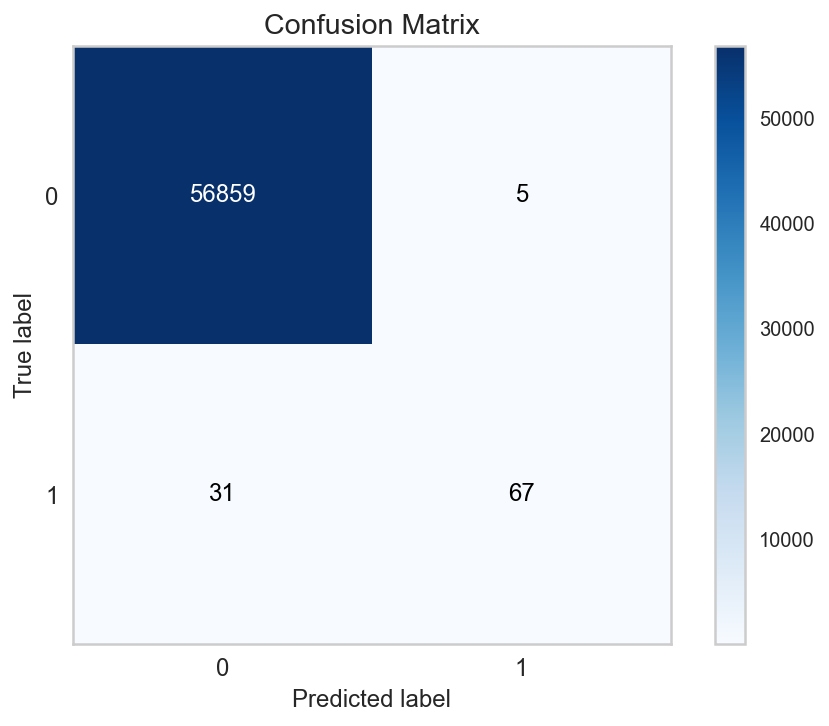

In [19]:
skmetrics.plot_confusion_matrix(ytx,ypreds)

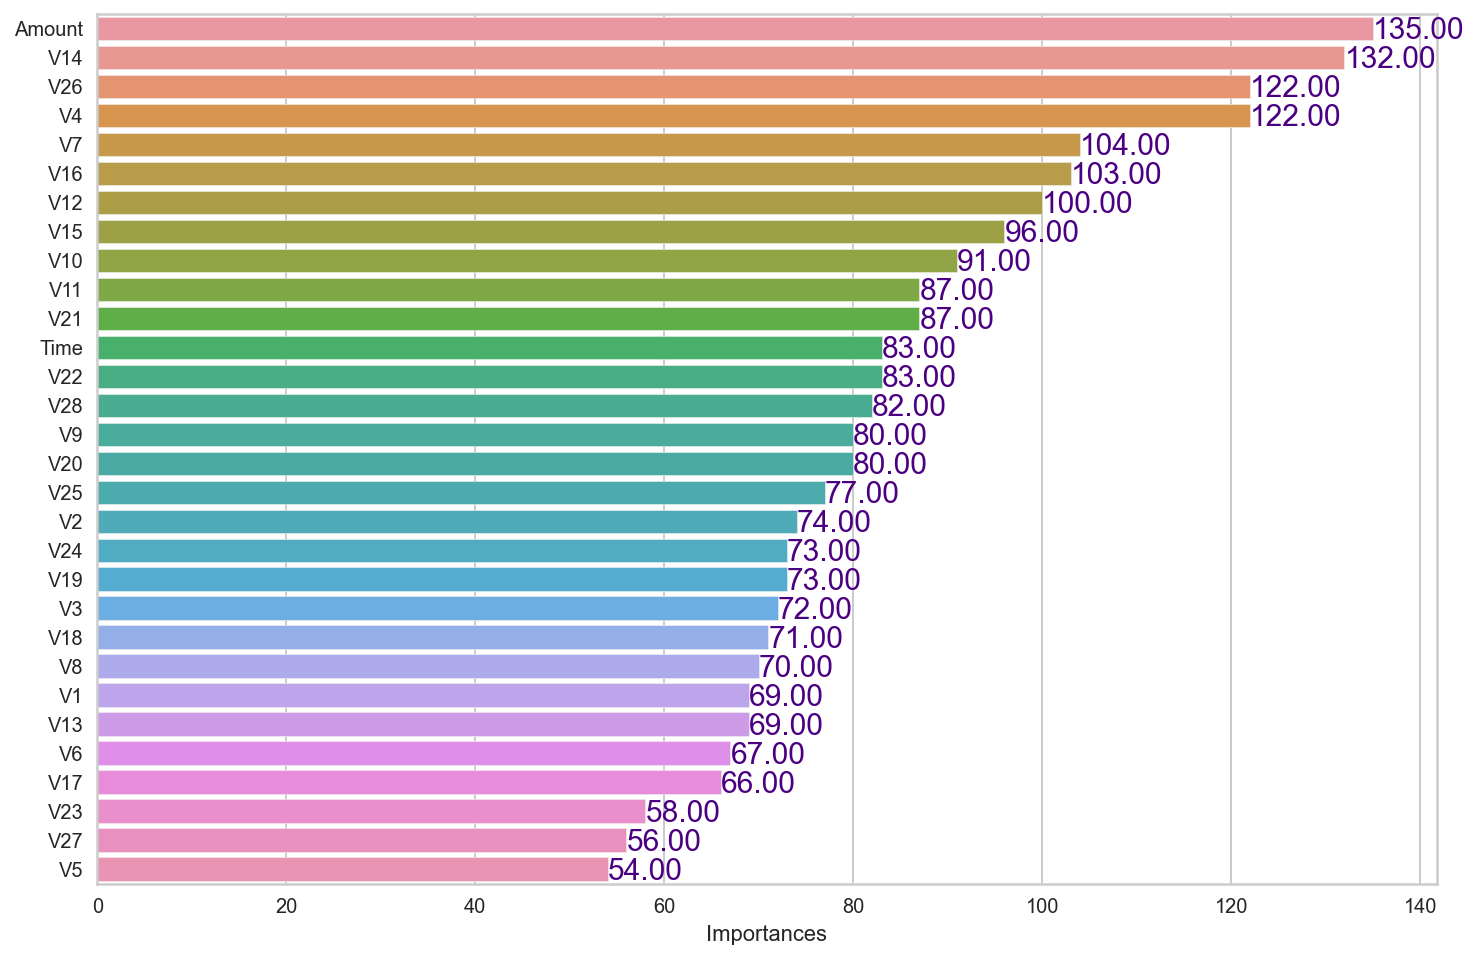

In [20]:
arr_fimp = model.feature_importances_
df_fimp = pd.DataFrame(arr_fimp,columns=['Importances'],index=df.columns.drop(target))
df_fimp = df_fimp.sort_values('Importances',ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x=df_fimp.Importances, y= df_fimp.index);

for p in ax.patches:
    x = p.get_width()
    y = p.get_y()
    text = '{:.2f}'.format(p.get_width())
    ax.text(x, y,text,fontsize=15,color='indigo',va='top',ha='left')

# LightGBM cross validation

In [21]:
%%time

X = df.drop('Class',axis=1).to_numpy()
y = df['Class'].to_numpy()

scores = cross_val_score(model,
                         X,y,
                         scoring ='f1',
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished


CPU times: user 106 ms, sys: 106 ms, total: 212 ms
Wall time: 16.2 s


In [22]:
trace = go.Table(
    header=dict(values=['<b>F1 score mean<b>', '<b>F1 score std<b>'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['center'],
                font = dict(size = 15)),
    cells=dict(values=[np.round(scores.mean(),6),
                       np.round(scores.std(),6)],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['center'], font = dict(size = 15)))

layout = dict(width=800, height=500,
              title = 'Cross validation - 5 folds [F1 score]',
              font = dict(size = 15))
fig = dict(data=[trace], layout=layout)
py.iplot(fig, filename = '../reports/figures/lightgbm_cross_validation.html')

# Model Interpretation

In [23]:
df.head(2)

Time                 V1                  V2               V3  \
0   0.0   -1.3598071336738 -0.0727811733098497 2.53634673796914   
1   0.0 1.1918571113148602    0.26615071205963 0.16648011335321   

                 V4                   V5                  V6  \
0  1.37815522427443 -0.33832076994251803   0.462387777762292   
1 0.448154078460911   0.0600176492822243 -0.0823608088155687   

                   V7                 V8                 V9  \
0   0.239598554061257 0.0986979012610507  0.363786969611213   
1 -0.0788029833323113 0.0851016549148104 -0.255425128109186   

                   V10                V11                V12  \
0   0.0907941719789316 -0.551599533260813 -0.617800855762348   
1 -0.16697441400461402 1.6127266610547901   1.06523531137287   

                 V13                  V14               V15  \
0 -0.991389847235408 -0.31116935369987897  1.46817697209427   
1   0.48909501589608   -0.143772296441519 0.635558093258208   

                   V16                 V17                  V18  \
0 -0.47040052525947795 0.20797124192924202   0.0257905801985591   
1    0.463917041022171  -0.114804663102346 -0.18336127012399397   

                   V19                 V20                V21  \
0    0.403992960255733   0.251412098239705 -0.018306777944153   
1 -0.14578304132525902 -0.0690831352230203 -0.225775248033138   

                  V22                 V23                  V24  \
0   0.277837575558899  -0.110473910188767   0.0669280749146731   
1 -0.6386719527718511 0.10128802125323402 -0.33984647552912706   

                  V25                V26                  V27  \
0 0.12853935827352803 -0.189114843888824  0.13355837674038698   
1   0.167170404418143  0.125894532368176 -0.00898309914322813   

                  V28  Amount  Class  
0 -0.0210530534538215  149.62      0  
1  0.0147241691924927    2.69      0

## Model interpretation using eli5

In [24]:
import eli5

eli5.show_weights(model)

In [25]:
from eli5.sklearn import PermutationImportance

feature_names = df_Xtrain.columns.tolist()
perm = PermutationImportance(model).fit(df_Xtest, ytx)
eli5.show_weights(perm, feature_names=feature_names)

## Model interpretation using lime

In [26]:
df.head(2)

Time                 V1                  V2               V3  \
0   0.0   -1.3598071336738 -0.0727811733098497 2.53634673796914   
1   0.0 1.1918571113148602    0.26615071205963 0.16648011335321   

                 V4                   V5                  V6  \
0  1.37815522427443 -0.33832076994251803   0.462387777762292   
1 0.448154078460911   0.0600176492822243 -0.0823608088155687   

                   V7                 V8                 V9  \
0   0.239598554061257 0.0986979012610507  0.363786969611213   
1 -0.0788029833323113 0.0851016549148104 -0.255425128109186   

                   V10                V11                V12  \
0   0.0907941719789316 -0.551599533260813 -0.617800855762348   
1 -0.16697441400461402 1.6127266610547901   1.06523531137287   

                 V13                  V14               V15  \
0 -0.991389847235408 -0.31116935369987897  1.46817697209427   
1   0.48909501589608   -0.143772296441519 0.635558093258208   

                   V16                 V17                  V18  \
0 -0.47040052525947795 0.20797124192924202   0.0257905801985591   
1    0.463917041022171  -0.114804663102346 -0.18336127012399397   

                   V19                 V20                V21  \
0    0.403992960255733   0.251412098239705 -0.018306777944153   
1 -0.14578304132525902 -0.0690831352230203 -0.225775248033138   

                  V22                 V23                  V24  \
0   0.277837575558899  -0.110473910188767   0.0669280749146731   
1 -0.6386719527718511 0.10128802125323402 -0.33984647552912706   

                  V25                V26                  V27  \
0 0.12853935827352803 -0.189114843888824  0.13355837674038698   
1   0.167170404418143  0.125894532368176 -0.00898309914322813   

                  V28  Amount  Class  
0 -0.0210530534538215  149.62      0  
1  0.0147241691924927    2.69      0

In [27]:
idx = 0
example = df_Xtest.iloc[idx]
answer = ser_ytest.iloc[idx]
feature_names = df_Xtest.columns.tolist()

prediction = model.predict(example.to_numpy().reshape(-1,1).T)


print(f'answer     = {answer}')
print('prediction = ', prediction[0])
print()
print(example)
print(feature_names)

Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.


answer     = 0
prediction =  0

Time                 154,078.0
V1          0.0466217161733807
V2          1.5296776897961102
V3          -0.453615431581372
V4            1.28256869092581
V5          1.1103333043003798
V6         -0.8827160367758601
V7            1.04641961287199
V8          -0.117120889435905
V9          -0.679896758880022
V10         -0.923708586587095
V11        0.37151880715529606
V12      -4.65403733486969e-05
V13          0.512255130763733
V14          -2.09176178331404
V15         0.7867961670963871
V16        0.15965161217948498
V17           1.70693919802755
V18          0.458921667945283
V19         0.0376653241714116
V20        0.24055896269233104
V21         -0.338471930001555
V22        -0.8395470604609929
V23         0.0665274156659575
V24          0.836446527969178
V25         0.0767903340099275
V26        -0.7751575455528921
V27        0.26101239906933604
V28         0.0583593223030088
Amount                    18.7
Name: 248750, dtype: float64
['Time', 

In [28]:
import lime
import lime.lime_tabular

# categorical_features = []
# categorical_features_idx = [df_Xtrain.columns.get_loc(col) 
#                               for col in categorical_features]

NUM_FEATURES = len(feature_names)
explainer = lime.lime_tabular.LimeTabularExplainer(df_Xtrain.to_numpy(), 
               feature_names=feature_names, 
               class_names=['Not-fraud','Fraud'], 
               mode='classification')

exp = explainer.explain_instance(example, model.predict_proba,
                                 num_features=NUM_FEATURES)
exp.show_in_notebook(show_table=True)

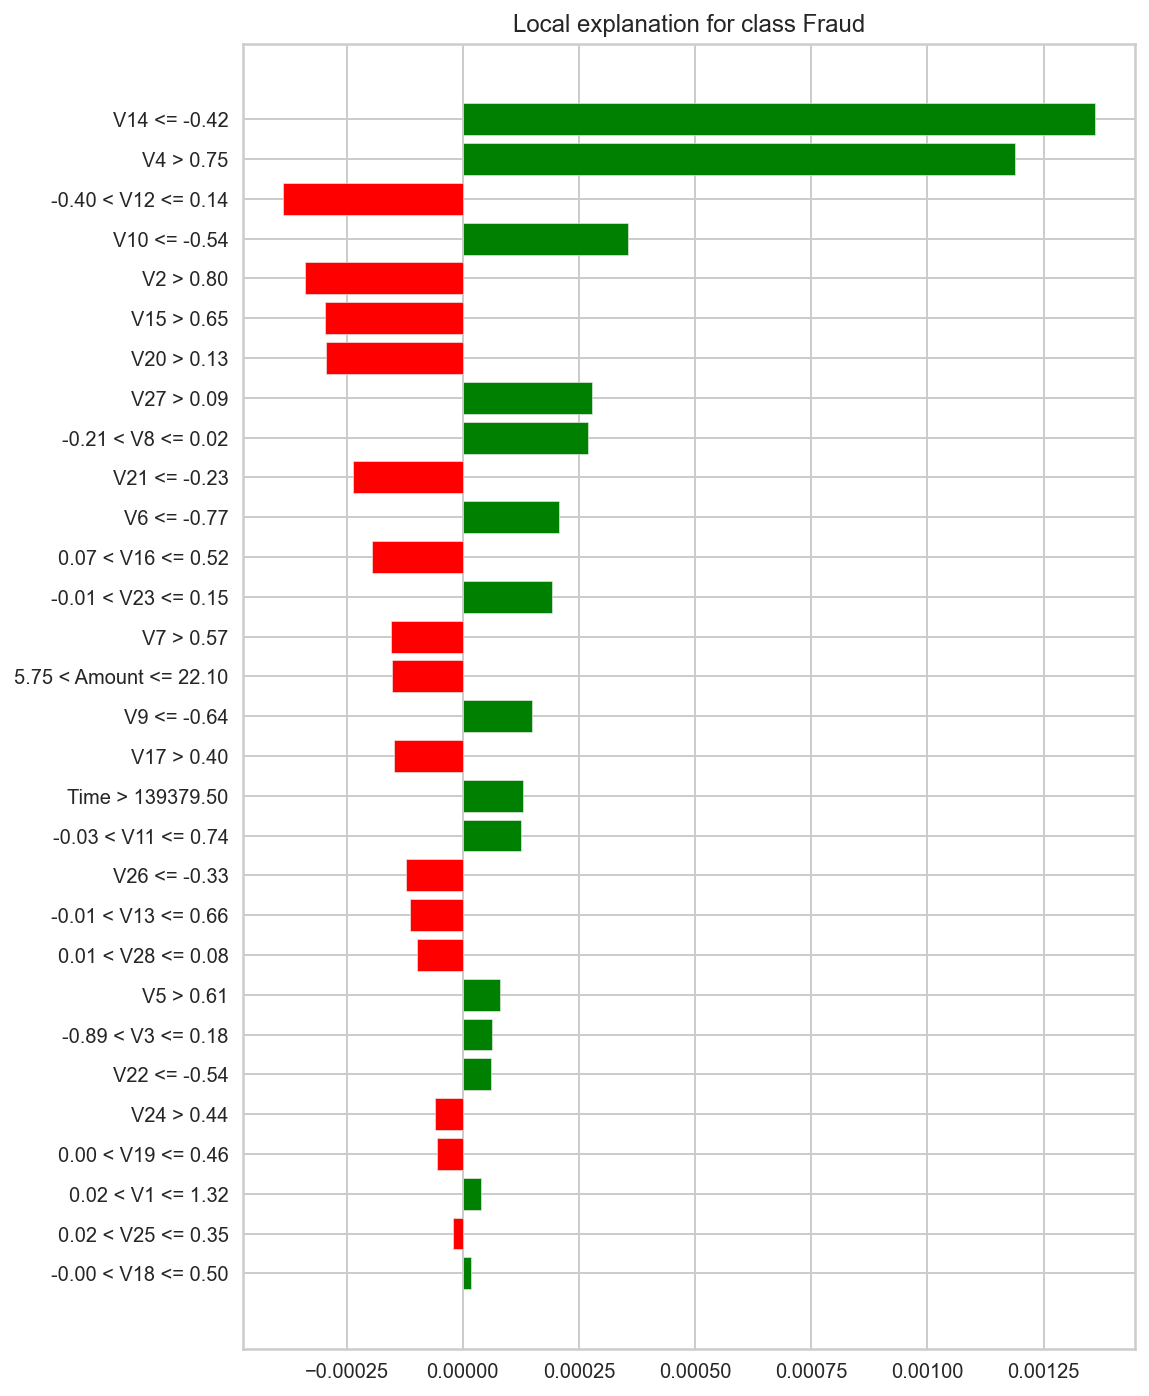

In [29]:
ax = exp.as_pyplot_figure(); # use semicolon
ax.set_figheight(12);

In [30]:
# show_method_attributes(ax,start='set')

## Model interpretation using shap
- [github link](https://github.com/slundberg/shap)
- [shap tutorial for ligtgbm](https://slundberg.github.io/shap/notebooks/tree_explainer/Census%20income%20classification%20with%20LightGBM.html)

In [31]:
import shap

shap.initjs()

In [32]:
show_method_attributes(shap)

Object Type: <class 'module'>



0                     1                         2  \
0    AdditiveExplainer       LinearExplainer             TreeExplainer   
1  BruteForceExplainer    PartitionExplainer  approximate_interactions   
2        DeepExplainer  PermutationExplainer                  bar_plot   
3    GradientExplainer     SamplingExplainer                    common   
4          ImageMasker           TokenMasker                  datasets   
5      KernelExplainer                  Tree             decision_plot   

                 3                          4                        5  \
0  dependence_plot                 image_plot                    other   
1   embedding_plot                     initjs  partial_dependence_plot   
2       explainers                     kmeans           partition_tree   
3       force_plot                 matplotlib                    plots   
4  have_matplotlib            monitoring_plot                   sample   
5  hclust_ordering  multioutput_decision_plot                save_html   

                6  
0    summary_plot  
1       text_plot  
2     unsupported  
3        warnings  
4  waterfall_plot  
5

In [33]:
%%time

explainer = shap.TreeExplainer(model)
shap_values = np.array(explainer.shap_values(df_Xtest))

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


CPU times: user 34.7 s, sys: 191 ms, total: 34.9 s
Wall time: 12.8 s


In [34]:
# shap.force_plot?

In [35]:
df_Xtest.shape, explainer.expected_value, type(explainer.expected_value), len(explainer.expected_value)

((56962, 30), [10.217948453389848, -10.217948453389848], list, 2)

In [36]:
idx = 5
shap.force_plot(explainer.expected_value[1],
                shap_values[1][idx,:],
                df_Xtest.iloc[idx,:] # this is just for giving feature names
               )

In [37]:
# many points
NUM = 1000
shap.force_plot(explainer.expected_value[1],
                shap_values[1][:NUM,:],
                df_Xtest.iloc[:NUM,:] # this is just for giving feature names
               )

# Time taken

In [38]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 3 min 3 secs
